### Trabalho 1 - Aprendizado Supervisionado

Andressa Moreira - 19204096

Cristiano Moreira Martins - 11111871

Ricardo Fonseca Zabir - 21104632


### Imports

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as CMD
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import  GaussianNB, BernoulliNB
from sklearn import tree
from sklearn.model_selection import KFold

### Conjunto de dados escolhido


- Título: Pima Indians Diabetes Database 
- Descrição: Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem ou não diabetes, com base em certas medidas de diagnóstico incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de ascendência indígena Pima. Os conjuntos de dados consistem em várias variáveis ​​preditoras médicas e uma variável alvo Outcome. As variáveis ​​preditoras incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade e assim por diante.
- Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- Interesse: Nosso interesse neste dataset se dá pelo fato de que todos os dados são númericos, não tem dados faltantes e o dataset é composto por 8 features e 1 label. Assim, não é necessário fazer grandes tratamento nos dados e posso focar mais no desenvolvimento/aprimoramento dos algoritmos propostos no enunciado do trabalho. Todo conjunto de dados conta uma história, essa história em específico é um assunto do nosso interesse já que ele trata sobre a saúde de mulheres com pelo menos 21 anos de idade com ascendência indígena Pima.
- Artigo: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/pdf/procascamc00018-0276.pdf


#### Features
* Pregnancies: número de gestações
* Glucose: concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose
* BloodPressure: pressão arterial diastólica (mm Hg)
* SkinThickness: espessura da dobra cutânea do tríceps (mm)
* Insuline: insulina sérica de 2 horas (mu U/ml)
* BMI: índice de massa corporal (peso em kg/(altura em m)^2)
* DiabetesPedigreeFunction: função hereditária de diabetes
* Age: idade
#### Label
* Outcome: variável de classe (0 ou 1). 268 de 768 são 1, as outras são 0.

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### K-nn

Inicio, antes de otimizações dos par

In [ ]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

x = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.13, random_state = 4)
# 87% para treinamento
# 13% para teste

# inicializamos o K como 4
k = 4 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
pred_y = neigh.predict(X_test)
print(f'Accuracy of model at k = {k} is {metrics.accuracy_score(y_test, pred_y)}')

Accuracy of model at k = 4 is 0.77


Após algumas tentativas de encontrar o K ideal (mais eficaz) mudando a proporção da amostragem de teste, descobrimos que 13% otimiza a eficiência do algorítmo.


Agora é hora de melhorar o modelo e descobrir o valor k ideal.

Menor erro: 0.16 em K = 26


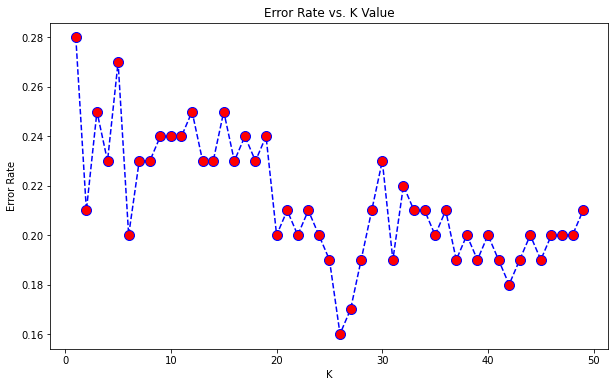

In [ ]:
error_rate = []

for i in range(1, 50): # esse range é escolhido por causa do ponto de inflexao 
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize = (10, 6))
plt.plot(range(1, 50), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print('Menor erro:', min(error_rate), 'em K =', error_rate.index(min(error_rate)) + 1)

A partir do gráfico acima, podemos observar que o menor erro é 0,16 e ele ocorre quando k é 26. Agora podemos visualizar o gráfico entre a precisão e o valor K.

Acurácia máxima: 0.84 at K = 26


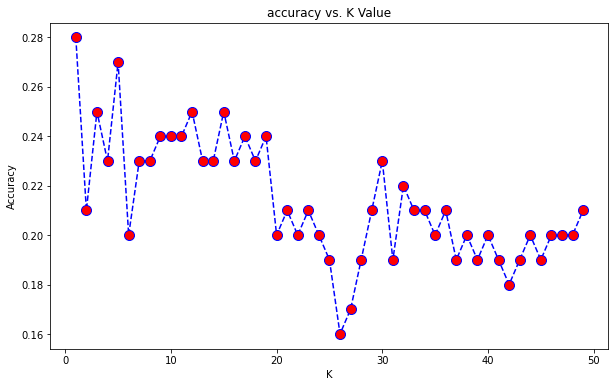

In [ ]:
acc = []

for i in range(1, 50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize = (10, 6))
plt.plot(range(1, 50), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print('Acurácia máxima:', max(acc), 'at K =', acc.index(max(acc)) + 1)


A partir do gráfico acima podemos observar que a acurácia máxima é 84% e ela se dá em k = 26.

k= 26   Acuracia= 0.84


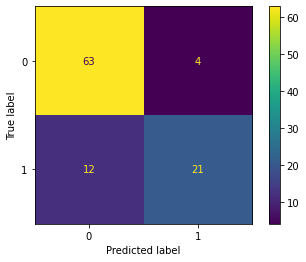

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 26).fit(X_train, y_train)
yhat = neigh.predict(X_test)

resultado = cm(y_test, yhat)
cm_display = CMD(resultado).plot()
print('k=', 26,'  Acuracia=', max(acc))

Obtivemos a precisão de 84% em k = 26. Como já vimos o erro mínimo em k = 26, a melhor eficiência é realmente em k = 26.
OBS: o valor de K encontrado geralmente é a raiz quadrada de N, onde N é o número total de amostras.

### Decision Tree

Árvores de Decisão para problemas de classificação são utilizadas para separar um grupo de amostras em subgrupos que tenham características iguais, de mosta a prever para uma amostra fora do conjunto, a qual subcnojunto ela pertencia. 

In [ ]:
# separando os dados
# a matriz X deve conter as features das amostras
# a matriz Y deve conter as classes de cada amostra
# a matriz Y é do tipo n x 1 (uma matriz que tem uma única coluna contendo um valor inteiro indicando a classe a que cada amostra pertence)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
# 80% para treino
# 20% para teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [ ]:
model_tree = DecisionTreeClassifier(max_leaf_nodes = 5, class_weight = 'balanced')
# Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined 
# as relative reduction in impurity. If None then unlimited number of leaf nodes. 
# modelo = DecisionTreeClassifier(class_weight = 'balanced')
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=5)

In [ ]:
features = list(X.columns)

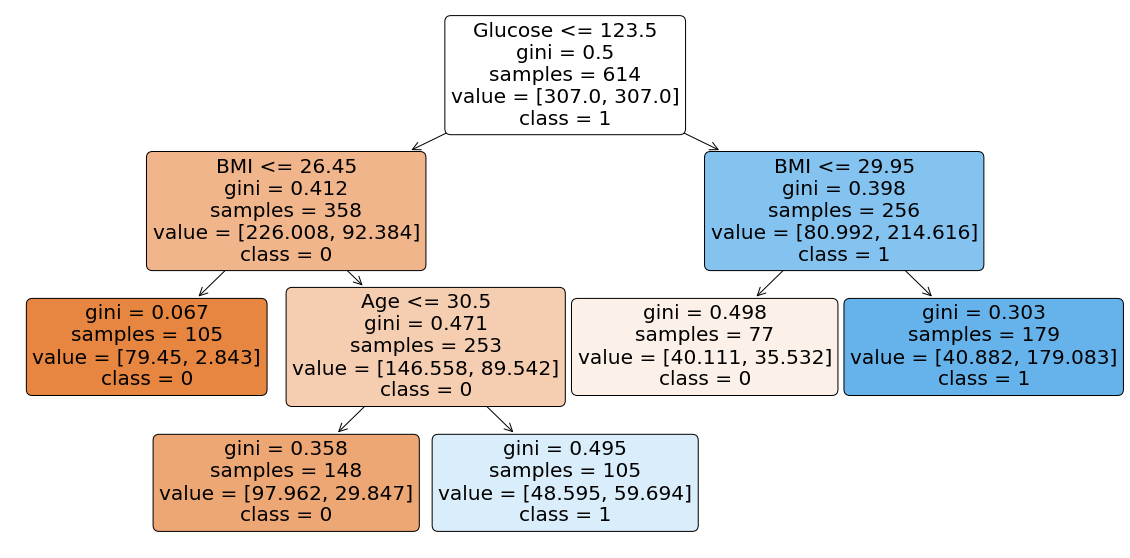

In [ ]:
plt.figure(figsize = (20, 10))
tree.plot_tree(model_tree,
          feature_names = features,
          class_names = ['0', '1'],
          rounded = True, # draw node boxes with rounded corners
          filled = True # paint nodes to indicate majority class for classification
          )

plt.show()

In [ ]:
y_train_pred = model_tree.predict(X_train)
y_test_pred = model_tree.predict(X_test)

In [ ]:
# Area Under the Curve score.

auc_train = metrics.roc_auc_score(y_train, y_train_pred)
auc_test = metrics.roc_auc_score(y_test, y_test_pred)

print('AUC Train = {}\nAUC Test = {}'. format(round(auc_train, 4), round(auc_test, 4)))

AUC Train = 0.7432
AUC Test = 0.7372


Vamos iterar para encontrar o nível apropriado de profundidade da árvore (max_leaf_nodes)
Para isso, vamos escrever todos os passos como uma função e chamar essa função em loop:

In [ ]:
def tree_training(max_leaf_nodes, X_train, y_train, X_test, y_test):
    model_tree = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, class_weight='balanced')
    model_tree.fit(X_train, y_train)
    
    y_train_pred = model_tree.predict(X_train)
    y_test_pred = model_tree.predict(X_test)
    
    auc_train = metrics.roc_auc_score(y_train, y_train_pred)
    auc_test = metrics.roc_auc_score(y_test, y_test_pred)
    
    print("Nodes:{}, Train:{:.4f}, Test:{:.4f}, Diff:{:.4f}".format(max_leaf_nodes,
                                                                     auc_train,
                                                                     auc_test,
                                                                     auc_train - auc_test))
          

# Run few iterations to find which max_tree_nodes works best
for i in range(2, 20):
    tree_training(i, X_train, y_train, X_test, y_test)

Nodes:2, Train:0.7176, Test:0.7136, Diff:0.0040
Nodes:3, Train:0.7176, Test:0.7136, Diff:0.0040
Nodes:4, Train:0.7251, Test:0.7195, Diff:0.0056
Nodes:5, Train:0.7432, Test:0.7372, Diff:0.0060
Nodes:6, Train:0.7616, Test:0.7174, Diff:0.0442
Nodes:7, Train:0.7704, Test:0.7321, Diff:0.0383
Nodes:8, Train:0.7704, Test:0.7321, Diff:0.0383
Nodes:9, Train:0.7764, Test:0.7181, Diff:0.0583
Nodes:10, Train:0.7902, Test:0.7481, Diff:0.0421
Nodes:11, Train:0.8000, Test:0.7383, Diff:0.0616
Nodes:12, Train:0.8056, Test:0.7334, Diff:0.0722
Nodes:13, Train:0.8056, Test:0.7334, Diff:0.0722
Nodes:14, Train:0.8056, Test:0.7334, Diff:0.0722
Nodes:15, Train:0.8056, Test:0.7334, Diff:0.0722
Nodes:16, Train:0.8113, Test:0.7430, Diff:0.0683
Nodes:17, Train:0.8153, Test:0.7430, Diff:0.0723
Nodes:18, Train:0.8248, Test:0.7183, Diff:0.1065
Nodes:19, Train:0.8282, Test:0.7134, Diff:0.1148


Esse teste nos mostra que não precisamos de um número muito grande de nodos folhas. É entre o intervalo de 5 a 7 nodos que obtivemos o maior AUC e portanto escolhemos 6 nodos como melhor parâmetro para max_leaf_nodes.


k-fold cross validation:

In [ ]:
kfold = KFold(5, shuffle=True, random_state=1)

for idx_train, idx_valid in kfold.split(df):
    X_train = df.loc[idx_train, features]
    y_train = df.loc[idx_train, 'Outcome']
    
    X_valid = df.loc[idx_valid, features]
    y_valid = df.loc[idx_valid, 'Outcome']
    
    # Try 10 leaf nodes, we saw lot of leaf nodes don't increase performance
    print("Iteration Starts")
    for i in range(2, 16):
        tree_training(i, X_train, y_train, X_valid, y_valid)
        
    
    print("Iteration Ends\n-----------------------")

Iteration Starts
Nodes:2, Train:0.7155, Test:0.7162, Diff:-0.0007
Nodes:3, Train:0.7155, Test:0.7162, Diff:-0.0007
Nodes:4, Train:0.7155, Test:0.7162, Diff:-0.0007
Nodes:5, Train:0.7351, Test:0.7606, Diff:-0.0255
Nodes:6, Train:0.7602, Test:0.7586, Diff:0.0016
Nodes:7, Train:0.7602, Test:0.7586, Diff:0.0016
Nodes:8, Train:0.7755, Test:0.7465, Diff:0.0290
Nodes:9, Train:0.7917, Test:0.7485, Diff:0.0432
Nodes:10, Train:0.7964, Test:0.7485, Diff:0.0479
Nodes:11, Train:0.8051, Test:0.7535, Diff:0.0516
Nodes:12, Train:0.8051, Test:0.7535, Diff:0.0516
Nodes:13, Train:0.8113, Test:0.7586, Diff:0.0528
Nodes:14, Train:0.8184, Test:0.7586, Diff:0.0598
Nodes:15, Train:0.8184, Test:0.7586, Diff:0.0598
Iteration Ends
-----------------------
Iteration Starts
Nodes:2, Train:0.7110, Test:0.7341, Diff:-0.0231
Nodes:3, Train:0.7110, Test:0.7341, Diff:-0.0231
Nodes:4, Train:0.7319, Test:0.6935, Diff:0.0384
Nodes:5, Train:0.7638, Test:0.6896, Diff:0.0742
Nodes:6, Train:0.7917, Test:0.7019, Diff:0.0899
Nod

### Naive Bayes

Naive Bayes são os classificadores que utilizam o teorema de Bayes como modelo em seu algoritmo.
A implementação utilizada foi a GaussianNB, que está disponível no scikit-learn.
A implementação GaussianNB utiliza como priori a distribuição normal.

Apenas para fins de comparação entre os classificadores que implementam o teorema de Bayes, utilizou-se também o classificador BernoulliNB mas esse classificador não apresentou uma acurácia maior do que o classificador que implementa a distribuição de probabilidade normal.

In [ ]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

kf = KFold(n_splits=6)

scoreGNB = cross_val_score(GaussianNB(), X, y, cv=kf)
scoreBNB = cross_val_score(BernoulliNB(), X, y, cv=kf)

print('Mean Accuracy - GNB',np.mean(scoreGNB))
print('Mean Accuracy - BNB', np.mean(scoreBNB))

Mean Accuracy - GNB 0.75390625
Mean Accuracy - BNB 0.6484375


### Conclusão sobre o desempenho dos algoritmos

In [ ]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

splits_df = pd.DataFrame(columns=['n_splits','DTC','GNB','KNC'])
results = pd.DataFrame(columns = ['split','Fold','Classifier','Accuracy','ROC-AUC','F1-Score','Recall','Precision'])
for i in range(2,20):
  print('split:',i)
  kf = KFold(n_splits=i)
  idx = 1
  
  classifiers = [
      GaussianNB(),
      DecisionTreeClassifier(max_leaf_nodes = 6, class_weight = 'balanced'),
      KNeighborsClassifier(n_neighbors = 26)]

  for train_index, test_index in kf.split(X, y):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    for clf in classifiers:
      
      sc = preprocessing.StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      clf = clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)

      Accuracy = metrics.accuracy_score(y_test, y_pred)
      Roc = metrics.roc_auc_score(y_test, gnb.predict_proba(X_test)[:,1])
      f1 = metrics.f1_score(y_test, y_pred)
      recall = metrics.recall_score(y_test,y_pred)
      precision = metrics.precision_score(y_test,y_pred)

      temp = pd.DataFrame([[i, idx, type(clf).__name__, Accuracy, Roc, f1,recall, precision]], 
                      columns = ['split', 'Fold', 'Classifier','Accuracy','ROC-AUC','F1-Score','Recall','Precision'],
                    index=[f'split-{i}'])
      results = results.append(temp)

    #print(f'Fold:{idx}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    idx+=1
  
  idx=0
  tempSplits = pd.DataFrame(index=[i], data=[
    {
        'n_splits':i,
        'DTC':results[results['Classifier']=='DecisionTreeClassifier'][['Accuracy']].mean()[0],
        'GNB':results[results['Classifier']=='GaussianNB'][['Accuracy']].mean()[0],
        'KNC':results[results['Classifier']=='KNeighborsClassifier'][['Accuracy']].mean()[0]
    }])
  
  splits_df = splits_df.append(tempSplits)

results

split: 2
split: 3
split: 4
split: 5
split: 6
split: 7
split: 8
split: 9
split: 10
split: 11
split: 12
split: 13
split: 14
split: 15
split: 16
split: 17
split: 18
split: 19


,split,Fold,Classifier,Accuracy,ROC-AUC,F1-Score,Recall,Precision
split-2,2,1,GaussianNB,0.736979,0.808801,0.624535,0.579310,0.677419
split-2,2,1,DecisionTreeClassifier,0.716146,0.808801,0.668693,0.758621,0.597826
split-2,2,1,KNeighborsClassifier,0.731771,0.808801,0.542222,0.420690,0.762500
split-2,2,2,GaussianNB,0.770833,0.841043,0.636364,0.626016,0.647059
split-2,2,2,DecisionTreeClassifier,0.687500,0.841043,0.612903,0.772358,0.508021
...,...,...,...,...,...,...,...,...
split-19,19,18,DecisionTreeClassifier,0.625000,0.789333,0.545455,0.600000,0.500000
split-19,19,18,KNeighborsClassifier,0.825000,0.789333,0.720000,0.600000,0.900000
split-19,19,19,GaussianNB,0.725000,0.854220,0.645161,0.588235,0.714286
split-19,19,19,DecisionTreeClassifier,0.775000,0.854220,0.756757,0.823529,0.700000


,DecisionTreeClassifier,GaussianNB,KNeighborsClassifier
0,0.704427,0.753906,0.744792


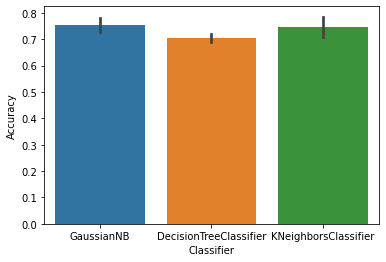

In [ ]:
plotdf = results[results['split']==6]

sns.barplot(data=plotdf, x='Classifier', y='Accuracy')
pd.DataFrame([
    {
        'DecisionTreeClassifier':plotdf[plotdf['Classifier']=='DecisionTreeClassifier'][['Accuracy']].mean()[0],
        'GaussianNB':plotdf[plotdf['Classifier']=='GaussianNB'][['Accuracy']].mean()[0],
        'KNeighborsClassifier':plotdf[plotdf['Classifier']=='KNeighborsClassifier'][['Accuracy']].mean()[0]
    }])

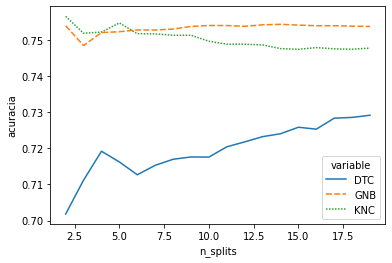

In [ ]:
#plot da acuracia conforme o numero de splits para o k-fold
sns.lineplot(x='n_splits', y='acuracia', hue='variable', style='variable', 
             data=pd.melt(splits_df, ['n_splits']).rename(columns={'value':'acuracia'}))

A partir dos experimentos feitos acima, concluimos que o algoritmo GaussianNB teve o melhor desempenho para o nosso conjunto de dados, no entanto esse resultado está diretamente ligado ao número de splits utilizado no KFold. Variando o número de splits KNeighbors e GaussianNB apresentam resultados próximos para a acurácia 


### Referências:

- https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
- Python para Data Science e Machine Learning Descomplicado
- https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes